<a href="https://www.kaggle.com/code/oscarjcc2002/clasification-car?scriptVersionId=209122427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning/ex.csv
/kaggle/input/deep-learning/mushroom_cleaned.csv
/kaggle/input/deep-learning/iris.csv
/kaggle/input/deep-learning/fake_real_news/fake_real_news/True.csv
/kaggle/input/deep-learning/fake_real_news/fake_real_news/fake_or_real_news.csv
/kaggle/input/deep-learning/fake_real_news/fake_real_news/Fake.csv
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/ReadMe.txt
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/right/chualsr2.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/right/chualsr3.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/right/chualsr5.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/right/chualsr1.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/right/chualsr4.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/left/chualsl4.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/left/chualsl3.bmp
/kaggle/input/deep-learning/eyes/MMU-Iris-Database/7/left/chualsl5.bmp
/kaggle/input/deep-learning/ey

In [2]:
!pip install --upgrade tensorflow-decision-forests tensorflow-text tf-keras
#!pip install --upgrade tensorflow
#!pip install tensorflow-decision-forests==1.9.1 tensorflow-text==2.17.0 tf-keras==2.17.0
!pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Succes

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
import tensorflow as tf
tf.__version__

2024-11-23 05:25:39.121070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 05:25:39.142770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-23 05:25:39.149212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.17.0'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [6]:
tf.config.optimizer.set_experimental_options({"layout_optimizer": False})

# Extraccion de Base de Datos


In [7]:
dir_train = "/kaggle/input/deep-learning/Cars Dataset 7 Models of Brands/Cars Dataset 7 Models of Brands/train"
dir_test = "/kaggle/input/deep-learning/Cars Dataset 7 Models of Brands/Cars Dataset 7 Models of Brands/test"

In [8]:
"""
train/
  Audi/
  Hyundai Creta/
  Rolls Royce/
  Swift/
  Tata Safari/
  Toyota Innova/
"""
dir_train

'/kaggle/input/deep-learning/Cars Dataset 7 Models of Brands/Cars Dataset 7 Models of Brands/train'

In [9]:
"""
test/
  Audi/
  Hyundai Creta/
  Rolls Royce/
  Swift/
  Tata Safari/
  Toyota Innova/
"""
dir_test

'/kaggle/input/deep-learning/Cars Dataset 7 Models of Brands/Cars Dataset 7 Models of Brands/test'

In [10]:
data_train = pathlib.Path(dir_train)
data_test = pathlib.Path(dir_test)

In [11]:
image_trian = len(list(data_train.glob('*/*.jpg')))
print(image_trian)

3352


In [12]:
print(len(list(data_train.glob('*Audi/*.jpg'))))
print(len(list(data_train.glob('*Hyundai Creta/*.jpg'))))
print(len(list(data_train.glob('*Mahindra Scorpio/*.jpg'))))
print(len(list(data_train.glob('*Rolls Royce/*.jpg'))))
print(len(list(data_train.glob('*Swift/*.jpg'))))
print(len(list(data_train.glob('*Tata Safari/*.jpg'))))
print(len(list(data_train.glob('*Toyota Innova/*.jpg'))))

814
271
316
311
424
441
775


In [13]:
image_test = len(list(data_test.glob('*/*.jpg')))
print(image_test)

813


In [14]:
print(len(list(data_test.glob('*Audi/*.jpg'))))
print(len(list(data_test.glob('*Hyundai Creta/*.jpg'))))
print(len(list(data_test.glob('*Mahindra Scorpio/*.jpg'))))
print(len(list(data_test.glob('*Rolls Royce/*.jpg'))))
print(len(list(data_test.glob('*Swift/*.jpg'))))
print(len(list(data_test.glob('*Tata Safari/*.jpg'))))
print(len(list(data_test.glob('*Toyota Innova/*.jpg'))))

199
67
75
74
102
106
190


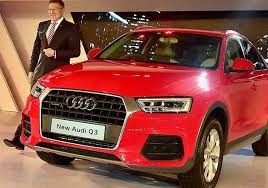

In [15]:
Audi = list(data_train.glob('Audi/*'))
PIL.Image.open(str(Audi[0]))

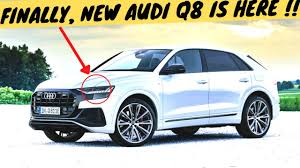

In [16]:
PIL.Image.open(str(Audi[1]))

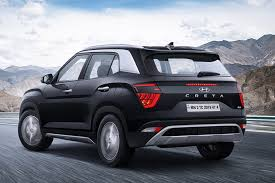

In [17]:
Hyundai_Creta = list(data_train.glob('Hyundai Creta/*'))
PIL.Image.open(str(Hyundai_Creta[0]))

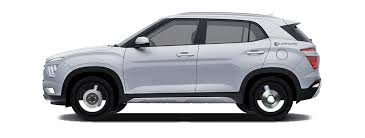

In [18]:
PIL.Image.open(str(Hyundai_Creta[1]))

# Ajuste de datos

In [19]:
batch_size = 56
img_height = 224
img_width = 224

In [20]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 813 files belonging to 7 classes.


I0000 00:00:1732339545.526787      24 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732339545.689145      24 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732339545.689455      24 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732339545.691856      24 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3352 files belonging to 7 classes.
Using 2682 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3352 files belonging to 7 classes.
Using 670 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


# Visualizacion de datos

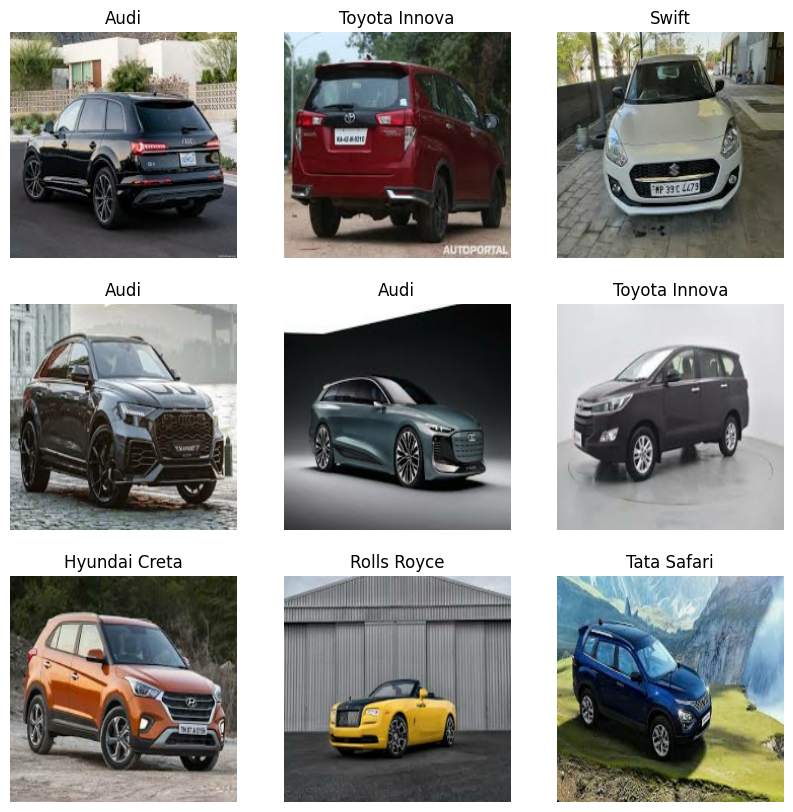

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(56, 224, 224, 3)
(56,)


# Configuracion de datos

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Normalizacion de datos

In [27]:
normalization_layer = layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Creacion de primer modelo

In [29]:
num_classes = len(class_names)

#first_model = Sequential([
#  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#  layers.Conv2D(16, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Flatten(),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(num_classes)
#])

first_model = Sequential([
  layers.Input(shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compilacion de primer modelo

In [30]:
first_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
first_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,143 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento de primer modelo

In [32]:
epochs=10
history = first_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


I0000 00:00:1732339557.246157      91 service.cc:146] XLA service 0x7a4da80055c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732339557.246193      91 service.cc:154]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0982 - loss: 2.2069

I0000 00:00:1732339561.210863      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.2313 - loss: 1.9873 - val_accuracy: 0.3910 - val_loss: 1.7043
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4407 - loss: 1.5891 - val_accuracy: 0.4701 - val_loss: 1.4582
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5973 - loss: 1.1838 - val_accuracy: 0.6090 - val_loss: 1.1440
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7809 - loss: 0.6769 - val_accuracy: 0.6149 - val_loss: 1.1348
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8868 - loss: 0.3512 - val_accuracy: 0.6448 - val_loss: 1.2562
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9642 - loss: 0.1478 - val_accuracy: 0.6075 - val_loss: 1.5643
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9744 - loss: 0.1001 - val_accuracy: 0.6582 - val_loss: 1.5851
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9890 - loss: 0.0416 - val_accuracy: 0.6552 - val_loss: 

# Visualizacion de resultados de entrenamiento

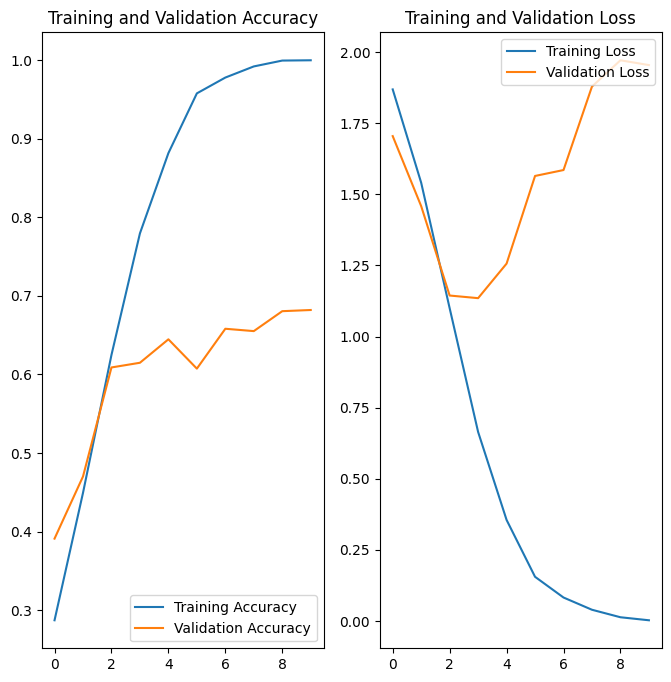

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
probability_first_model = tf.keras.Sequential([first_model,
                                         tf.keras.layers.Softmax()])

In [35]:
small_test_ds = test_ds.take(1)
#small_test_ds_Autotune = small_test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
small_test_ds_Autotune = small_test_ds.cache().prefetch(buffer_size=AUTOTUNE)
#small_test_ds_Autotune = small_test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
predictions_fm = probability_first_model.predict(small_test_ds_Autotune)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [37]:
len(predictions_fm)

56

In [38]:
predictions_fm[0]

array([0.03620312, 0.5001977 , 0.16183558, 0.05510879, 0.0052039 ,
       0.02336431, 0.2180866 ], dtype=float32)

In [39]:
np.argmax(predictions_fm[0])

1

In [40]:
image_test_batch, label_test_batch = next(iter(small_test_ds_Autotune))

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label, img
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label,num_classes):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(num_classes))
  plt.yticks([])
  thisplot = plt.bar(range(num_classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

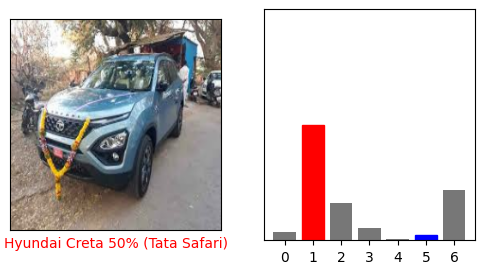

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_fm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
plt.subplot(1,2,2)
plot_value_array(i, predictions_fm[i], label_test_batch[i],num_classes)
plt.show()

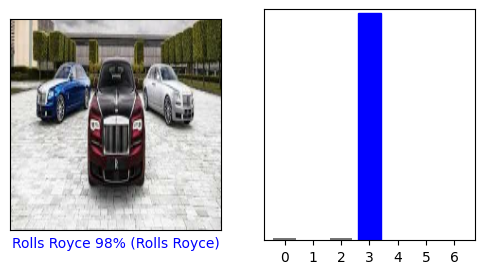

In [43]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_fm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
plt.subplot(1,2,2)
plot_value_array(i, predictions_fm[i], label_test_batch[i], num_classes)
plt.show()

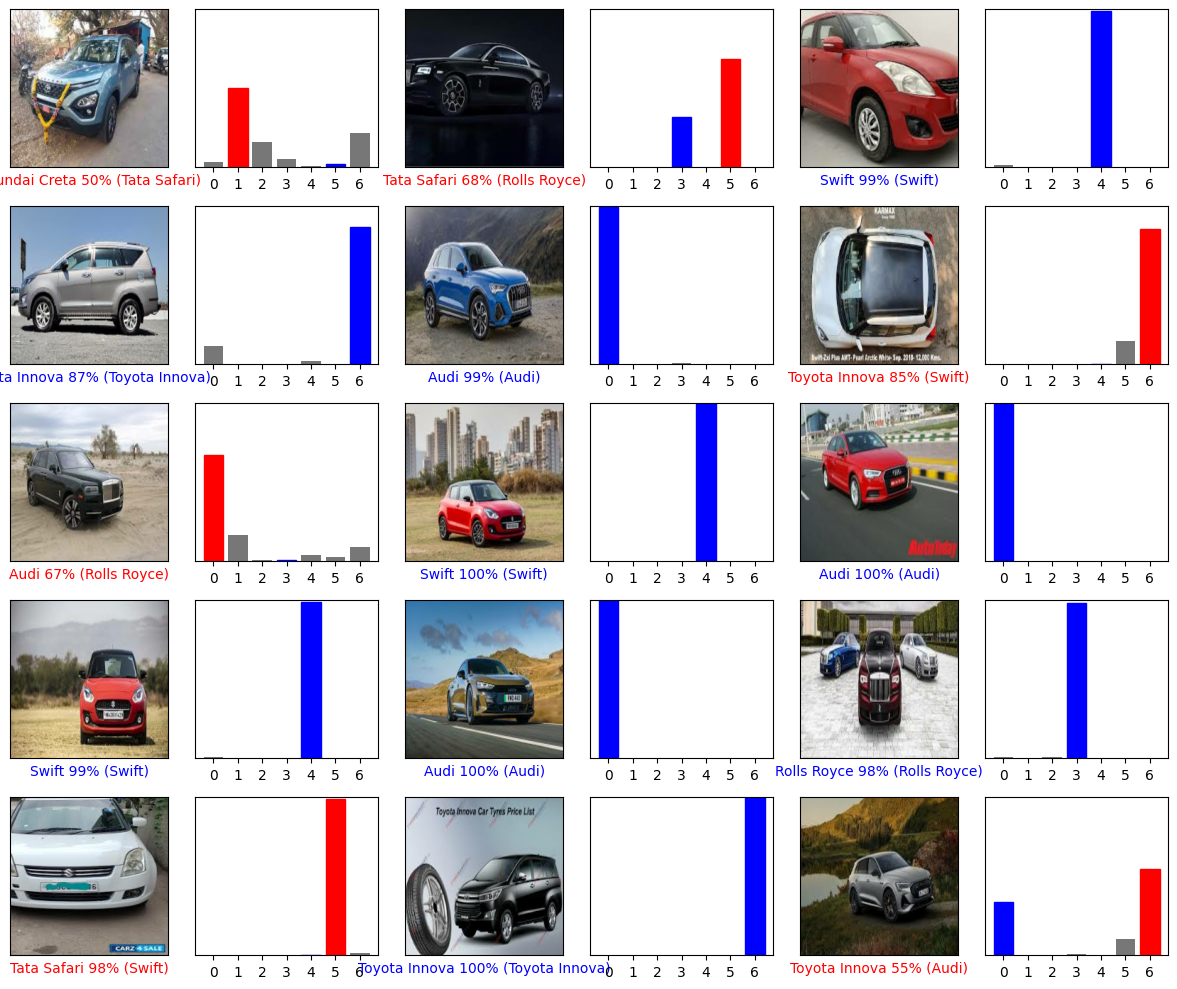

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_fm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_fm[i], label_test_batch[i], num_classes)
plt.tight_layout()
plt.show()

# Reajuste de datos

In [45]:
#data_augmentation = keras.Sequential(
#  [
#    layers.RandomFlip("horizontal",
#                      input_shape=(img_height,
#                                  img_width,
#                                  3)),
#    layers.RandomRotation(0.1),
#    layers.RandomZoom(0.1),
#  ]
#)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),  # No es necesario especificar input_shape aquí
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

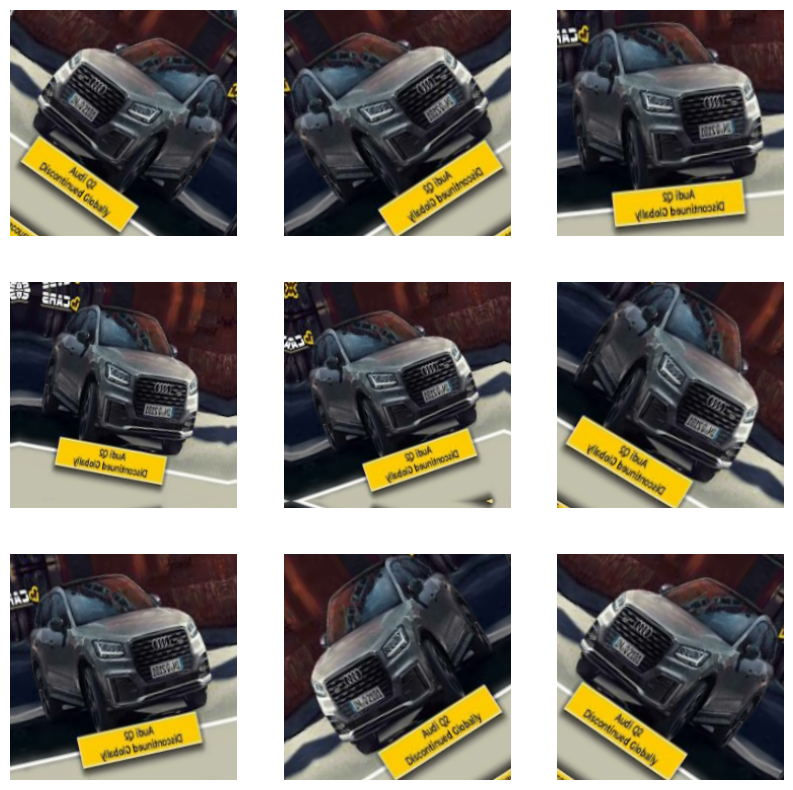

In [46]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Creacion de segundo modelo

In [47]:
#second_model = Sequential([
#  data_augmentation,
#  layers.Rescaling(1./255),
#  layers.Conv2D(16, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Dropout(0.2),
#  layers.Flatten(),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(num_classes, name="outputs")
#])
second_model = Sequential([
  layers.Input(shape=(img_height, img_width, 3)),
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compilacion de segundo model

In [48]:
second_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
second_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,143 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento de segundo modelo

In [50]:
epochs = 15
history = second_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


W0000 00:00:1732339589.256514      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.276384      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.278642      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.281675      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.284915      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.287759      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.291033      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.293760      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339589.296332      94 gp

 1/48 ━━━━━━━━━━━━━━━━━━━━ 2:18 3s/step - accuracy: 0.1786 - loss: 2.0042

W0000 00:00:1732339590.034733      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.040349      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.050097      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.053455      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.061346      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.069230      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.077151      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.089923      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339590.103417      94 gp

35/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1969 - loss: 2.5745

W0000 00:00:1732339591.742648      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.744475      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.746289      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.748759      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.751396      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.753752      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.756450      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.758731      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339591.760892      94 gp

36/48 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1970 - loss: 2.5623

W0000 00:00:1732339592.147131      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.152534      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.160924      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.163981      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.171033      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.178080      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.185137      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.195619      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339592.207753      94 gp

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.2013 - loss: 2.4372 - val_accuracy: 0.2970 - val_loss: 1.8178
Epoch 2/15


W0000 00:00:1732339593.014285      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.016187      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.018111      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.020747      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.023561      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.026076      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.028944      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.031339      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339593.033617      93 gp

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2909 - loss: 1.8192 - val_accuracy: 0.3224 - val_loss: 1.7514
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3340 - loss: 1.7688 - val_accuracy: 0.4090 - val_loss: 1.6431
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4015 - loss: 1.6637 - val_accuracy: 0.4149 - val_loss: 1.5565
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4350 - loss: 1.5762 - val_accuracy: 0.4627 - val_loss: 1.4713
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4404 - loss: 1.5162 - val_accuracy: 0.5045 - val_loss: 1.3876
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4769 - loss: 1.4123 - val_accuracy: 0.5373 - val_loss: 1.2864
Epoch 8/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5092 - loss: 1.3462 - val_accuracy: 0.5896 - val_loss: 1.2131
Epoch 9/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5603 - loss: 1.2366 - val_accuracy: 0.5642 - val_loss: 1.

# Visualizacion de resultados de entrenamiento del segundo modelos

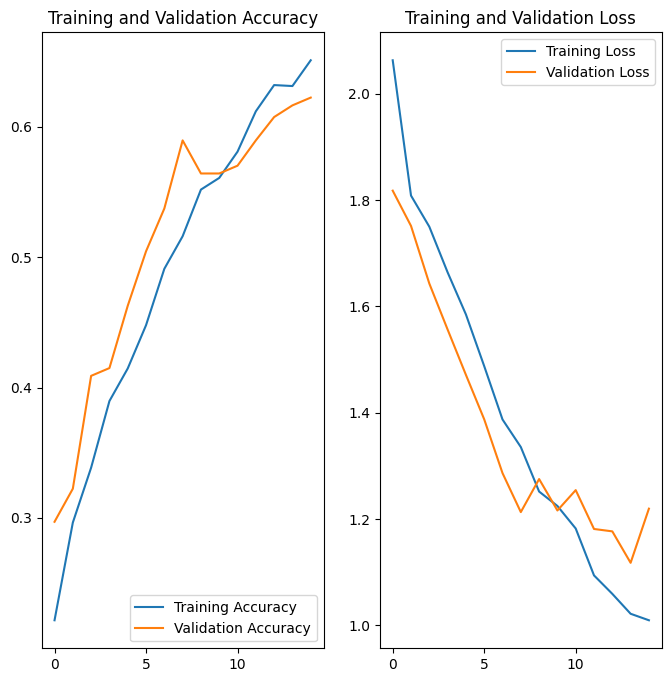

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
probability_second_model = tf.keras.Sequential([second_model,
                                         tf.keras.layers.Softmax()])

In [53]:
predictions_sm = probability_second_model.predict(small_test_ds_Autotune)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [54]:
len(predictions_sm)

56

In [55]:
predictions_sm[0]

array([0.22852267, 0.22139077, 0.12849087, 0.07749415, 0.00984605,
       0.31341258, 0.02084296], dtype=float32)

In [56]:
np.argmax(predictions_sm[0])

5

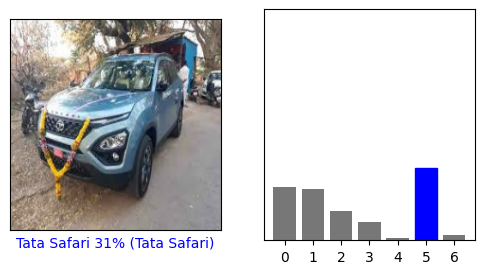

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_sm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
plt.subplot(1,2,2)
plot_value_array(i, predictions_sm[i], label_test_batch[i],num_classes)
plt.show()

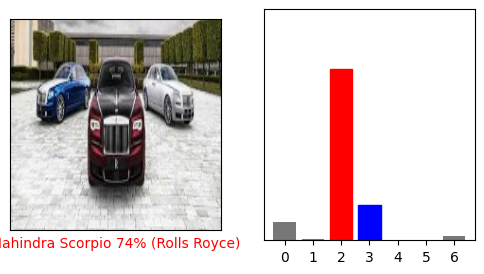

In [58]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_sm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
plt.subplot(1,2,2)
plot_value_array(i, predictions_sm[i], label_test_batch[i], num_classes)
plt.show()

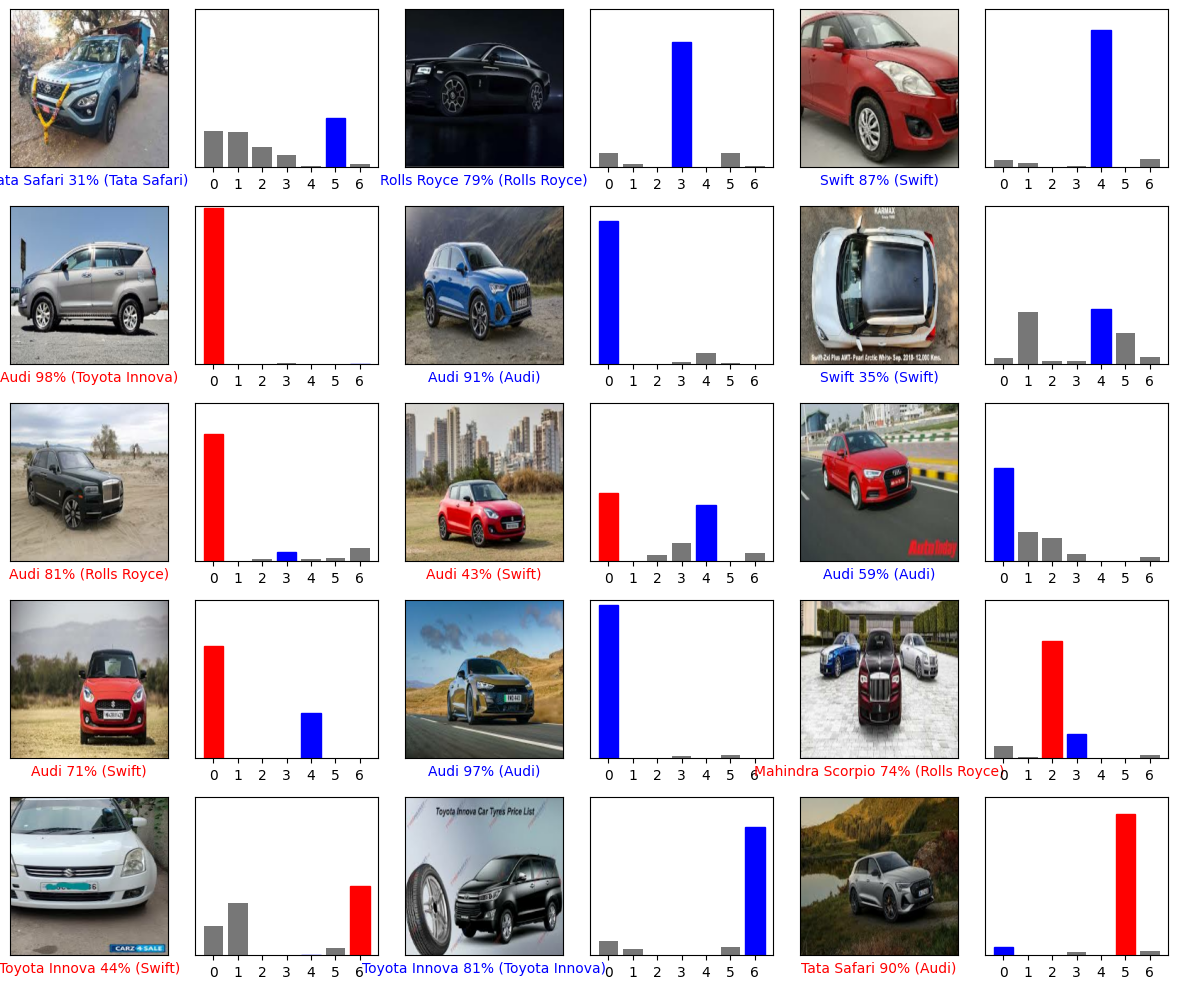

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_sm[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_sm[i], label_test_batch[i], num_classes)
plt.tight_layout()
plt.show()

82382/82382 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


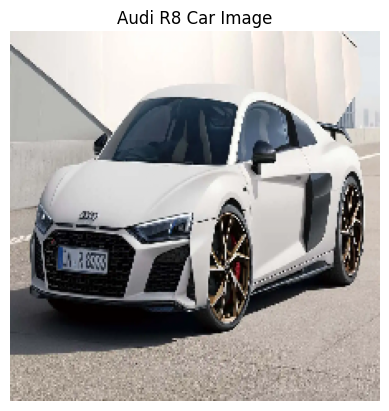

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
This image most likely belongs to Audi with a 31.16 percent confidence according to the first model.
This image most likely belongs to Audi with a 31.17 percent confidence according to the second model.


W0000 00:00:1732339628.461226      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.462014      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.462559      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.463078      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.463580      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.464105      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.464668      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.465184      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732339628.465718      93 gp

In [60]:
car1_url = "https://cdn.motor1.com/images/mgl/VzM4p7/s2/audi-r8-japan-final-edition.webp"
car1_path = tf.keras.utils.get_file('Audi', origin=car1_url)

image = tf.keras.preprocessing.image.load_img(car1_path, target_size=(img_height, img_width))  # Cambia el tamaño según tus necesidades
image_ar = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen si es necesario
image_ar = image_ar / 255.0  # Normalizar a [0, 1]

plt.imshow(image_ar)
plt.axis('off')  # Opcional: ocultar los ejes
plt.title('Audi R8 Car Image')  # Título opcional
plt.show()

img = tf.keras.utils.load_img(
    car1_path, target_size=(img_height, img_width)
)

img_array_car1 = tf.keras.utils.img_to_array(img)
img_array_car1 = tf.expand_dims(img_array_car1, 0) # Create a batch
img_array_car1 = tf.data.Dataset.from_tensor_slices([img_array_car1])
img_array_car1 = img_array_car1.cache().prefetch(buffer_size=AUTOTUNE)

predictions_fm_car1 = probability_first_model.predict(img_array_car1)
predictions_sm_car1 = probability_second_model.predict(img_array_car1)
score_fm_car1 = tf.nn.softmax(predictions_fm_car1[0])
score_sm_car1 = tf.nn.softmax(predictions_sm_car1[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the first model."
    .format(class_names[np.argmax(score_fm_car1)], 100 * np.max(score_fm_car1))
)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the second model."
    .format(class_names[np.argmax(score_sm_car1)], 100 * np.max(score_sm_car1))
)

150081/150081 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


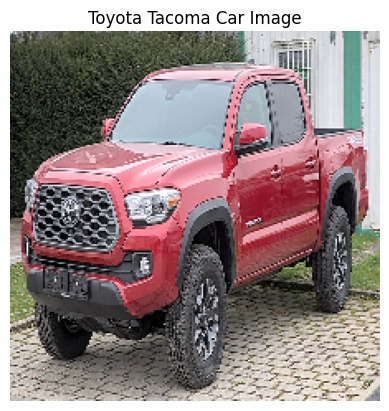

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
This image most likely belongs to Audi with a 31.16 percent confidence according to the first model.
This image most likely belongs to Audi with a 31.17 percent confidence according to the second model.


In [61]:
car2_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Toyota_Tacoma_%28N300%29_TRD_1X7A2438.jpg/800px-Toyota_Tacoma_%28N300%29_TRD_1X7A2438.jpg"
car2_path = tf.keras.utils.get_file('Toyota', origin=car2_url)

image = tf.keras.preprocessing.image.load_img(car2_path, target_size=(img_height, img_width))  # Cambia el tamaño según tus necesidades
image_ar = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen si es necesario
image_ar = image_ar / 255.0  # Normalizar a [0, 1]

plt.imshow(image_ar)
plt.axis('off')  # Opcional: ocultar los ejes
plt.title('Toyota Tacoma Car Image')  # Título opcional
plt.show()

img_car2 = tf.keras.utils.load_img(
    car2_path, target_size=(img_height, img_width)
)

img_array_car2 = tf.keras.utils.img_to_array(img)
img_array_car2 = tf.expand_dims(img_array_car2, 0) # Create a batch
img_array_car2 = tf.data.Dataset.from_tensor_slices([img_array_car2])
img_array_car2 = img_array_car2.cache().prefetch(buffer_size=AUTOTUNE)

predictions_fm_car2 = probability_first_model.predict(img_array_car2)
predictions_sm_car2 = probability_second_model.predict(img_array_car2)
score_fm_car2 = tf.nn.softmax(predictions_fm_car2[0])
score_sm_car2 = tf.nn.softmax(predictions_sm_car2[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the first model."
    .format(class_names[np.argmax(score_fm_car2)], 100 * np.max(score_fm_car2))
)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the second model."
    .format(class_names[np.argmax(score_sm_car2)], 100 * np.max(score_sm_car2))
)

52802/52802 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


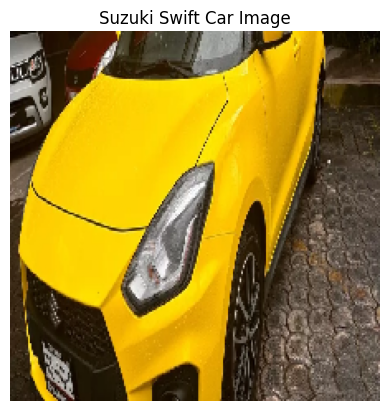

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
This image most likely belongs to Audi with a 31.16 percent confidence according to the first model.
This image most likely belongs to Audi with a 31.17 percent confidence according to the second model.


In [62]:
car3_url = "https://http2.mlstatic.com/D_NQ_NP_892183-MLM79208452311_092024-UC.webp"
car3_path = tf.keras.utils.get_file('Swift', origin=car3_url)

image = tf.keras.preprocessing.image.load_img(car3_path, target_size=(img_height, img_width))  # Cambia el tamaño según tus necesidades
image_ar = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen si es necesario
image_ar = image_ar / 255.0  # Normalizar a [0, 1]

plt.imshow(image_ar)
plt.axis('off')  # Opcional: ocultar los ejes
plt.title('Suzuki Swift Car Image')  # Título opcional
plt.show()

img_car3 = tf.keras.utils.load_img(
    car3_path, target_size=(img_height, img_width)
)

img_array_car3 = tf.keras.utils.img_to_array(img)
img_array_car3 = tf.expand_dims(img_array_car3, 0) # Create a batch
img_array_car3 = tf.data.Dataset.from_tensor_slices([img_array_car3])
img_array_car3 = img_array_car3.cache().prefetch(buffer_size=AUTOTUNE)

predictions_fm_car3 = probability_first_model.predict(img_array_car3)
predictions_sm_car3 = probability_second_model.predict(img_array_car3)
score_fm_car3 = tf.nn.softmax(predictions_fm_car3[0])
score_sm_car3 = tf.nn.softmax(predictions_sm_car3[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the first model."
    .format(class_names[np.argmax(score_fm_car3)], 100 * np.max(score_fm_car3))
)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the second model."
    .format(class_names[np.argmax(score_sm_car3)], 100 * np.max(score_sm_car3))
)